## The size of random forest

## Programming Assignment: Размер случайного леса

In [1]:
import numpy as np
import pandas
from lib.helpersmd import write_to_file

In [2]:
data=pandas.read_csv('abalone.csv')
print data.head()
print data.describe()
print data.info()

  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  
            Length     Diameter       Height  WholeWeight  ShuckedWeight  \
count  4177.000000  4177.000000  4177.000000  4177.000000    4177.000000   
mean      0.523992     0.407881     0.139516     0.828742       0.359367   
std       0.120093     0.099240     0.041827     0.490389       0.221963   
min       0.075000     0.055000     0.000000     0.002000       0.001000   
25%    

Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. Если вы используете Pandas, то подойдет следующий код: data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.

In [3]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
y=data['Rings']
X=data.drop('Rings',1)

Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.

Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

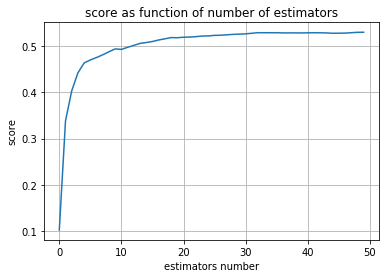

first classifier with score over 0.52 has 22 estimators


In [4]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=1)
scoring='r2'
ansr=-1
scores=[]
for num in range(1,51):
    clf = RandomForestRegressor(random_state=1,n_estimators=num)
    scr=cross_val_score(clf, X, y, cv=cv,scoring = scoring).mean()
    scores.append(scr)
    if ansr==-1 and scr>0.52:
        ansr=num
        
import matplotlib.pyplot as plt
from lib.plotmd import plotVector
plotVector(np.array(scores),"score as function of number of estimators","estimators number","score")
plt.show()

print "first classifier with score over 0.52 has {} estimators".format(ansr)
write_to_file(ansr,"week%d-A%dT%d.out"%(5,1,1))
#write_to_file(str(ansr),'task1.out')
